# Data loading and visualization

In [1]:
import JupyterNotebooksLib as slicernb

# Set image viewer size to 50% (fill half of a cell)
slicernb.AppWindow.setWindowSize(scale=0.5)
# Hide patient information from slice view
slicernb.showSliceViewAnnotations(False)

## 3D volume display

In [2]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load a Slicer sample data set
import SampleData
volume = SampleData.SampleDataLogic().downloadMRBrainTumor1()

print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

Volume size: (256, 256, 112)


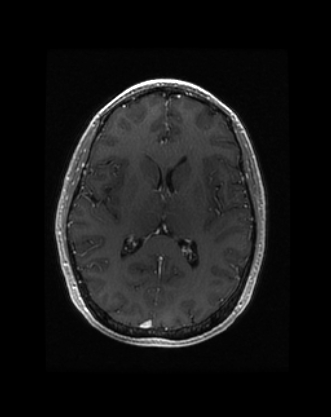

In [3]:
# Show slice view
slicernb.ViewDisplay("OneUpRedSlice")

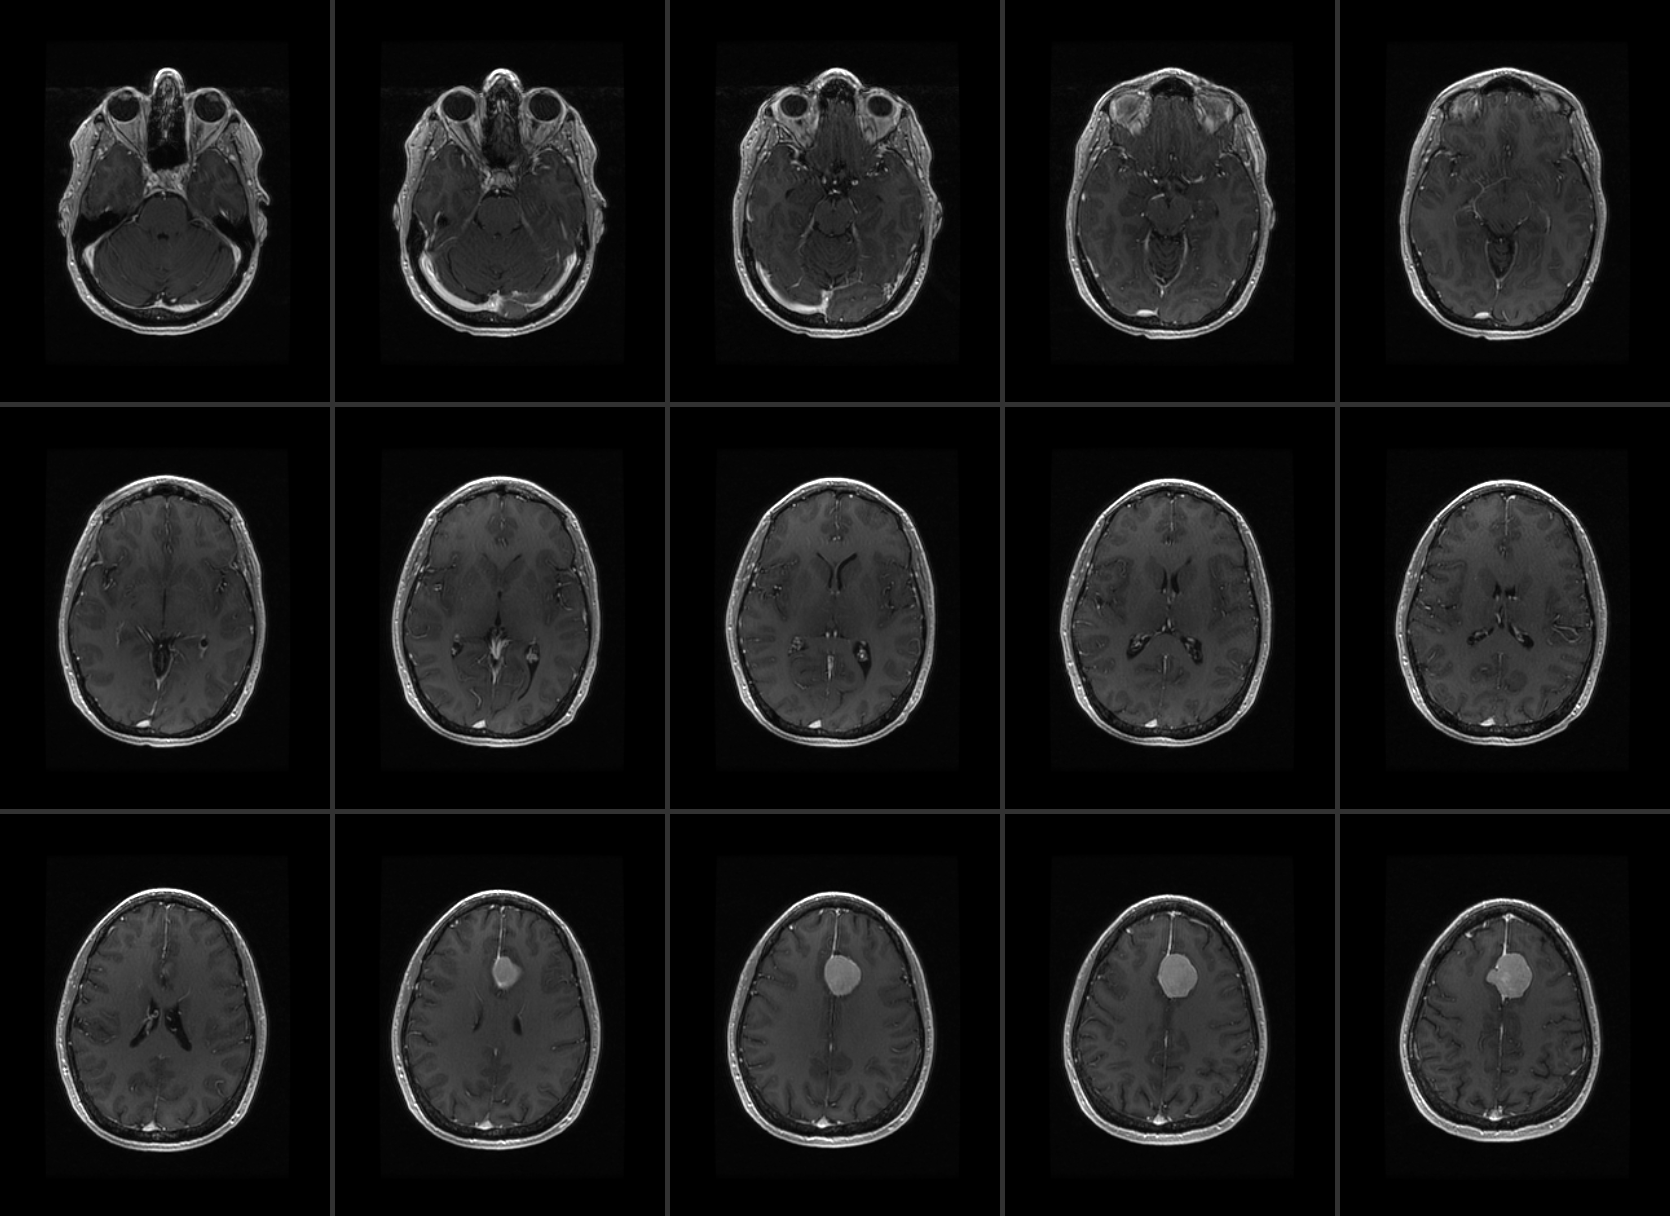

In [4]:
# Lightbox view
slicernb.ViewLightboxDisplay("Red", columns=5, rows=3, rangeShrink=[45,50])

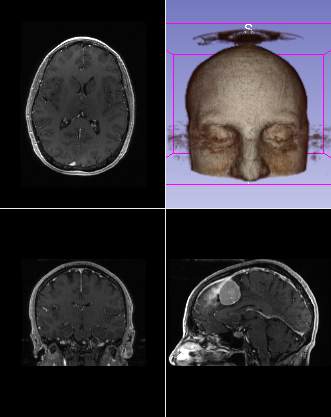

In [5]:
# Enable 3D volume rendering
slicernb.showVolumeRendering(volume)

# Show slice and 3D views
slicernb.ViewDisplay("FourUp")  # You can also try: FourUp, OneUpRedSlice, OneUp3D

## Dynamic views - Level 1. View objects + standard widgets
- Displayed content is saved in the notebook
- Views cannot be placed in a layout
- Low update rate (only for small adjustment of view parameters)
- Mouse and keyboard events are not captured

In [6]:
# Slice view display
from ipywidgets import interact
@interact(position=(0,100))
def update(position=50):
    return slicernb.ViewSliceDisplay('Red', positionPercent=position)

interactive(children=(IntSlider(value=50, description='position'), Output()), _dom_classes=('widget-interact',…

In [7]:
# Enable volume cropping
displayNode = slicer.modules.volumerendering.logic().GetFirstVolumeRenderingDisplayNode(volume)
displayNode.SetCroppingEnabled(True)
roiNode = displayNode.GetROINode()

# 3D view display
slicernb.reset3DView()
from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5), cropx=(0,70,5), cropy=(0,120,5), cropz=(0, 80, 5))
def update(roll=0, pitch=0, yaw=0, cropx=70, cropy=120, cropz=80):
    roiNode.SetRadiusXYZ([cropx, cropy, cropz])
    return slicernb.View3DDisplay(0, orientation=[roll, pitch, yaw])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

## Dynamic views - Level 2. View widgets
- Widgets can be placed in a layout
- Widget state (displayed content) is not saved in the notebook by default
- Low update rate (only for small adjustment of view parameters)
- Mouse and keyboard events are not captured

In [8]:
# Slice widgets
import JupyterNotebooksLib as slicernb
from ipywidgets import HBox
slicernb.ViewSliceWidget('Red')
display(HBox([slicernb.ViewSliceWidget('Red'), slicernb.ViewSliceWidget('Yellow'), slicernb.ViewSliceWidget('Green')]))

In [9]:
# 3D widget
display(HBox([slicernb.ViewSliceBaseWidget('Red', width="40%"), slicernb.View3DWidget(0, width="40%")]))

## Dynamic views - Level 3. Interactive view widgets
- Some view controlling mouse and keyboard events are captured
- Only selected view can be displayed and controlled
- Medium update rate (somewhat usable on remote computers)

In [11]:
# Adjust maximum rate of Slicer's Jupyter kernel consuming Jupyter messages.
# Lower values make the notebook more responsive but too low values may make the Slicer application
# slow to respond.
slicer.modules.jupyterkernel.setPollIntervalSec(0.001)

# 3D view
slicernb.AppWindow.setWindowSize(scale=0.5)
live3d = slicernb.ViewInteractiveWidget('1')
live3d.trackMouseMove = True
display(live3d)

ViewInteractiveWidget(height=193, width=178)

In [12]:
# Slice view (use arrow keys to move between slices, right-click-and-drag to zoom in/out)
liveRedSlice = slicernb.ViewInteractiveWidget('R')
liveRedSlice.trackMouseMove = True
display(liveRedSlice)

ViewInteractiveWidget(height=193, width=178)

## Interactive views - Level 4. Remote application window view
- High update rate (suitable for working on remote computers)
- All mouse and keyboard events are captured
- Full application window can be displayed and controlled
- Only available if Jupyter desktop server is configured 

In [13]:
slicernb.showVolumeRendering(volume, show=True)
app = slicernb.AppWindow()
app
# Note: "404 : Not Found" error will be displayed if Jupyter desktop server is not configured.

In [14]:
# Show full application GUI
app.setContents("full")
slicer.util.selectModule("VolumeRendering")

In [31]:
# Create link that shows the application GUI in a new browser tab
from ipywidgets import HTML
HTML(f"""<a href="{slicernb.AppWindow.defaultDesktopUrl()}" target="_blank">
<b>Click here</b> to open application window in a new browser tab.</a>""")

HTML(value='<a href="/desktop/" target="_blank">\n<b>Click here</b> to open application window in a new browse…

## Markups display

In [14]:
import numpy as np
markupPoints = np.array([
    [ 69.12484176,  -8.73226641,  -2.175     ],
    [ 56.3258959 ,  32.61817407,  -2.175     ],
    [ 46.15237483,  57.88788769,  -2.175     ],
    [ 34.02739799,  74.35843751,  -2.175     ],
    [  3.93193405,  85.64423649,  -2.175     ],
    [-45.51061385,  62.53521954,  -2.175     ],
    [-61.63318381, -10.01634531,  -2.175     ],
    [-51.97287678, -54.02084408,  -2.175     ],
    [-18.1022449 , -87.94210015,  -2.175     ],
    [ 32.95255999, -83.64274816,  -2.175     ],
    [ 58.6231426 , -59.59987177,  -2.175     ],
    [ 67.88479492, -35.27503826,  -2.175     ]])

closedCurve = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLMarkupsClosedCurveNode")
slicer.util.updateMarkupsControlPointsFromArray(closedCurve, markupPoints)

closedCurve  # slicernb.displayable(obj) is called automatially for cell outputs

,label,position.R,position.A,position.S,selected,visible,description
0,MarkupsClosedCurve-1,69.124842,-8.732266,-2.175,True,True,
1,MarkupsClosedCurve-2,56.325896,32.618174,-2.175,True,True,
2,MarkupsClosedCurve-3,46.152375,57.887888,-2.175,True,True,
3,MarkupsClosedCurve-4,34.027398,74.358438,-2.175,True,True,
4,MarkupsClosedCurve-5,3.931934,85.644236,-2.175,True,True,
5,MarkupsClosedCurve-6,-45.510614,62.535220,-2.175,True,True,
6,MarkupsClosedCurve-7,-61.633184,-10.016345,-2.175,True,True,
7,MarkupsClosedCurve-8,-51.972877,-54.020844,-2.175,True,True,
8,MarkupsClosedCurve-9,-18.102245,-87.942100,-2.175,True,True,
9,MarkupsClosedCurve-10,32.952560,-83.642748,-2.175,True,True,


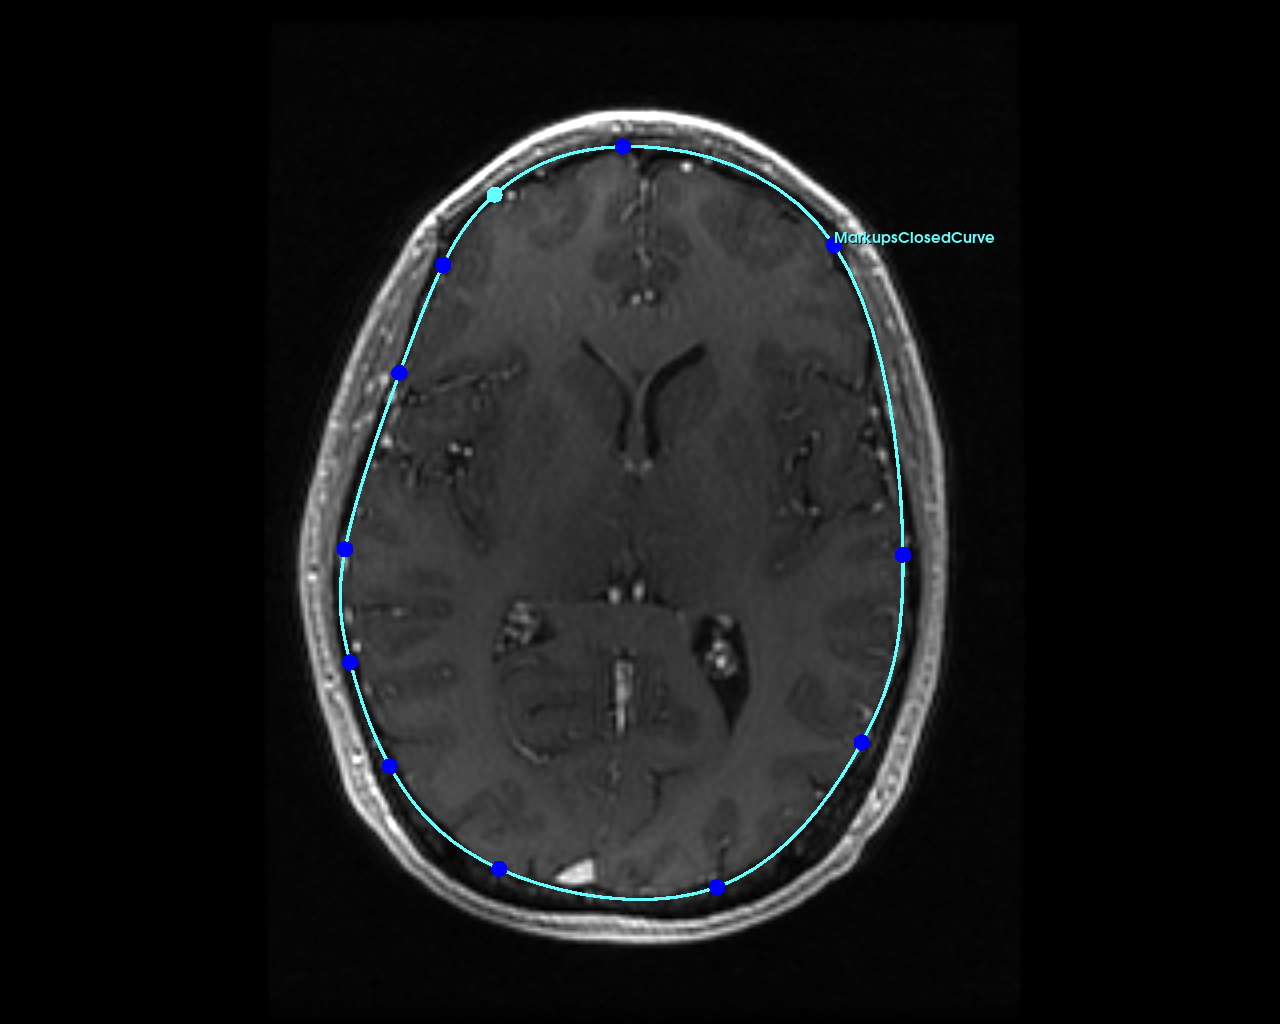

In [15]:
closedCurve.SetNthControlPointSelected(3, False)
closedCurve.GetDisplayNode().SetSelectedColor(0,0,1)
closedCurve.GetDisplayNode().SetGlyphScale(5)
closedCurve.GetDisplayNode().UseGlyphScaleOn()
slicer.util.setSliceViewerLayers(fit=True)
slicer.modules.markups.logic().JumpSlicesToNthPointInMarkup(closedCurve.GetID(), 1)
app.setWindowSize(scale=1.0)
app.setContents("viewers")
slicernb.ViewDisplay('OneUpRedSlice', center=False)

# Model display
An experimental approach is used for displaying model nodes. They are rendered outside the views in the layout, therefore only this node is visible.

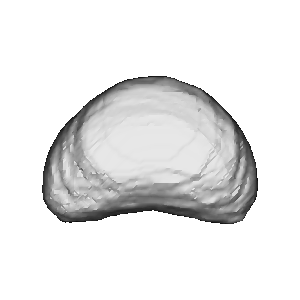

In [16]:
# Simple static display

modelNode=slicer.modules.models.logic().AddModel(slicernb.localPath("data/ProstateMeanShape.stl"))
modelNode

In [17]:
# Interactive view rotation

from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-90.0,90.0,5))
def update(roll=0, pitch=0, yaw=0):
    return slicernb.ModelDisplay(modelNode, orientation=[roll, pitch, yaw], imageSize=[200,200])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

# Plotting using matplotlib

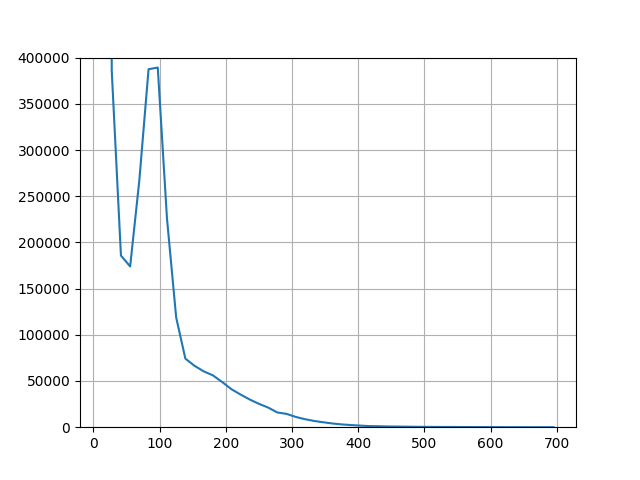

In [19]:
try:
  import matplotlib
except ModuleNotFoundError:
  pip_install('matplotlib')
  import matplotlib

matplotlib.use('Agg')

# Get a volume from SampleData and compute its histogram
import numpy as np
histogram = np.histogram(arrayFromVolume(volume), bins=50)

# Show a plot using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(histogram[1][1:], histogram[0].astype(float))
ax.grid(True)
ax.set_ylim((0, 4e5))

slicernb.MatplotlibDisplay(plt)

#### Run this example in your browser using Binder: [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/slicer/SlicerNotebooks/master?filepath=01_Data_loading_and_display.ipynb)